In [102]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt


In [104]:
df = pd.read_csv("phones_list2-Sayfa 1-phones_list.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_title               105 non-null    object 
 1   price                       105 non-null    float64
 2   marka                       105 non-null    object 
 3   isletim_sistemi             105 non-null    object 
 4   bellek_depolama_kapasitesi  105 non-null    float64
 5   ekran_boyutu                92 non-null     float64
 6   model_adi                   80 non-null     object 
 7   puan                        105 non-null    float64
 8   degerlendirme_sayisi        105 non-null    float64
dtypes: float64(5), object(4)
memory usage: 8.6+ KB


In [106]:
df.columns

Index(['product_title', 'price', 'marka', 'isletim_sistemi',
       'bellek_depolama_kapasitesi', 'ekran_boyutu', 'model_adi', 'puan',
       'degerlendirme_sayisi'],
      dtype='object')

In [108]:
df['price']

0      37149.0
1      14834.0
2       8599.0
3      50799.0
4      24999.0
        ...   
115        NaN
116     6919.0
117    17149.0
118    16499.0
119    16199.0
Name: price, Length: 120, dtype: float64

In [110]:
df.isnull().sum()

product_title                 15
price                         15
marka                         15
isletim_sistemi               15
bellek_depolama_kapasitesi    15
ekran_boyutu                  28
model_adi                     40
puan                          15
degerlendirme_sayisi          15
dtype: int64

In [112]:
df2=df[df["price"].notnull()]

In [114]:
df2

,product_title,price,marka,isletim_sistemi,bellek_depolama_kapasitesi,ekran_boyutu,model_adi,puan,degerlendirme_sayisi
0,Apple iPhone 13 (128 GB) - Gece Yarısı,37149.0,Apple,iOS 14,128.0,NaN,iPhone 13 128 GB Gece Yarısı,4.7,2275.0
1,Samsung Galaxy A35 5G Akıllı Cep Telefonu 8 GB...,14834.0,SAMSUNG,Android 14,8.0,66.0,Galaxy A35 256,4.5,100.0
2,Samsung Galaxy A24 Akıllı Cep Telefonu 6 GB RA...,8599.0,SAMSUNG,Android 130,128.0,NaN,NaN,4.3,336.0
3,Apple iPhone 15 (128 GB) - Mavi,50799.0,Apple,iOs,128.0,61.0,iPhone 15,4.6,414.0
4,Samsung Galaxy S23 FE 8 GB RAM. 256 GB Hafıza....,24999.0,SAMSUNG,Android 130,8.0,64.0,SM-S711BZACTUR,4.4,104.0
...,...,...,...,...,...,...,...,...,...
114,Apple iPhone 14 Plus (128 GB) - Gece yarısı,46499.0,Apple,iOs,128.0,67.0,iPhone 14 Plus,4.6,361.0
116,Samsung Galaxy A05S Akıllı Cep Telefonu 4 GB R...,6919.0,SAMSUNG,Android 130,4.0,67.0,1,4.4,62.0
117,Oppo Reno11 F 5G 8 GB RAM 256 GB Cep Telefonu ...,17149.0,OPPO,Android 130,256.0,NaN,Oppo Reno 11F 5G,5.0,2.0
118,Samsung Galaxy S21 FE 5G 2Nesil Akıllı Cep Tel...,16499.0,SAMSUNG,Android 130,8.0,64.0,Galaxy S21 FE 5G,4.3,122.0


In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_title               105 non-null    object 
 1   price                       105 non-null    float64
 2   marka                       105 non-null    object 
 3   isletim_sistemi             105 non-null    object 
 4   bellek_depolama_kapasitesi  105 non-null    float64
 5   ekran_boyutu                92 non-null     float64
 6   model_adi                   80 non-null     object 
 7   puan                        105 non-null    float64
 8   degerlendirme_sayisi        105 non-null    float64
dtypes: float64(5), object(4)
memory usage: 8.2+ KB


In [118]:
df2.drop(["product_title"], axis=1, inplace=True)

/var/folders/n3/k68xf8c11pl5pyg2zyy0b61m0000gn/T/ipykernel_33886/2885764924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["product_title"], axis=1, inplace=True)


In [120]:
df2.drop(["marka"], axis=1, inplace=True)

/var/folders/n3/k68xf8c11pl5pyg2zyy0b61m0000gn/T/ipykernel_33886/2289616452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["marka"], axis=1, inplace=True)


In [122]:
df2.drop(["isletim_sistemi"], axis=1, inplace=True)

/var/folders/n3/k68xf8c11pl5pyg2zyy0b61m0000gn/T/ipykernel_33886/3167211977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["isletim_sistemi"], axis=1, inplace=True)


In [124]:
df2.drop(["model_adi"], axis=1, inplace=True) 

/var/folders/n3/k68xf8c11pl5pyg2zyy0b61m0000gn/T/ipykernel_33886/249384837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["model_adi"], axis=1, inplace=True)


In [126]:
df2

,price,bellek_depolama_kapasitesi,ekran_boyutu,puan,degerlendirme_sayisi
0,37149.0,128.0,NaN,4.7,2275.0
1,14834.0,8.0,66.0,4.5,100.0
2,8599.0,128.0,NaN,4.3,336.0
3,50799.0,128.0,61.0,4.6,414.0
4,24999.0,8.0,64.0,4.4,104.0
...,...,...,...,...,...
114,46499.0,128.0,67.0,4.6,361.0
116,6919.0,4.0,67.0,4.4,62.0
117,17149.0,256.0,NaN,5.0,2.0
118,16499.0,8.0,64.0,4.3,122.0


In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 119
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       105 non-null    float64
 1   bellek_depolama_kapasitesi  105 non-null    float64
 2   ekran_boyutu                92 non-null     float64
 3   puan                        105 non-null    float64
 4   degerlendirme_sayisi        105 non-null    float64
dtypes: float64(5)
memory usage: 4.9 KB


In [130]:
df2['ekran_boyutu'].fillna(value = df2['ekran_boyutu'].median(), inplace=True)

/var/folders/n3/k68xf8c11pl5pyg2zyy0b61m0000gn/T/ipykernel_33886/1895402923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['ekran_boyutu'].fillna(value = df2['ekran_boyutu'].median(), inplace=True)
/var/folders/n3/k68xf8c11pl5pyg2zyy0b61m0000gn/T/ipykernel_33886/1895402923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ekran

In [132]:
df2['ekran_boyutu'].median()

65.0

In [134]:
df2.corr() 

,price,bellek_depolama_kapasitesi,ekran_boyutu,puan,degerlendirme_sayisi
price,1.000000,0.330599,-0.032766,0.256734,0.118440
bellek_depolama_kapasitesi,0.330599,1.000000,-0.082199,0.555135,0.290518
ekran_boyutu,-0.032766,-0.082199,1.000000,-0.332296,-0.109941
puan,0.256734,0.555135,-0.332296,1.000000,0.286771
degerlendirme_sayisi,0.118440,0.290518,-0.109941,0.286771,1.000000


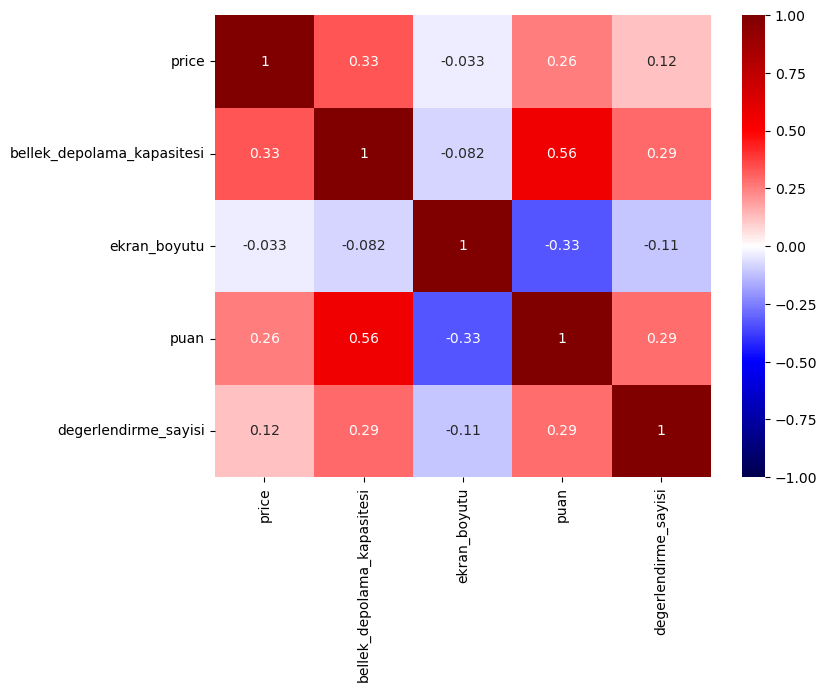

In [137]:
plt.figure(figsize=[8,6])
sns.heatmap(df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

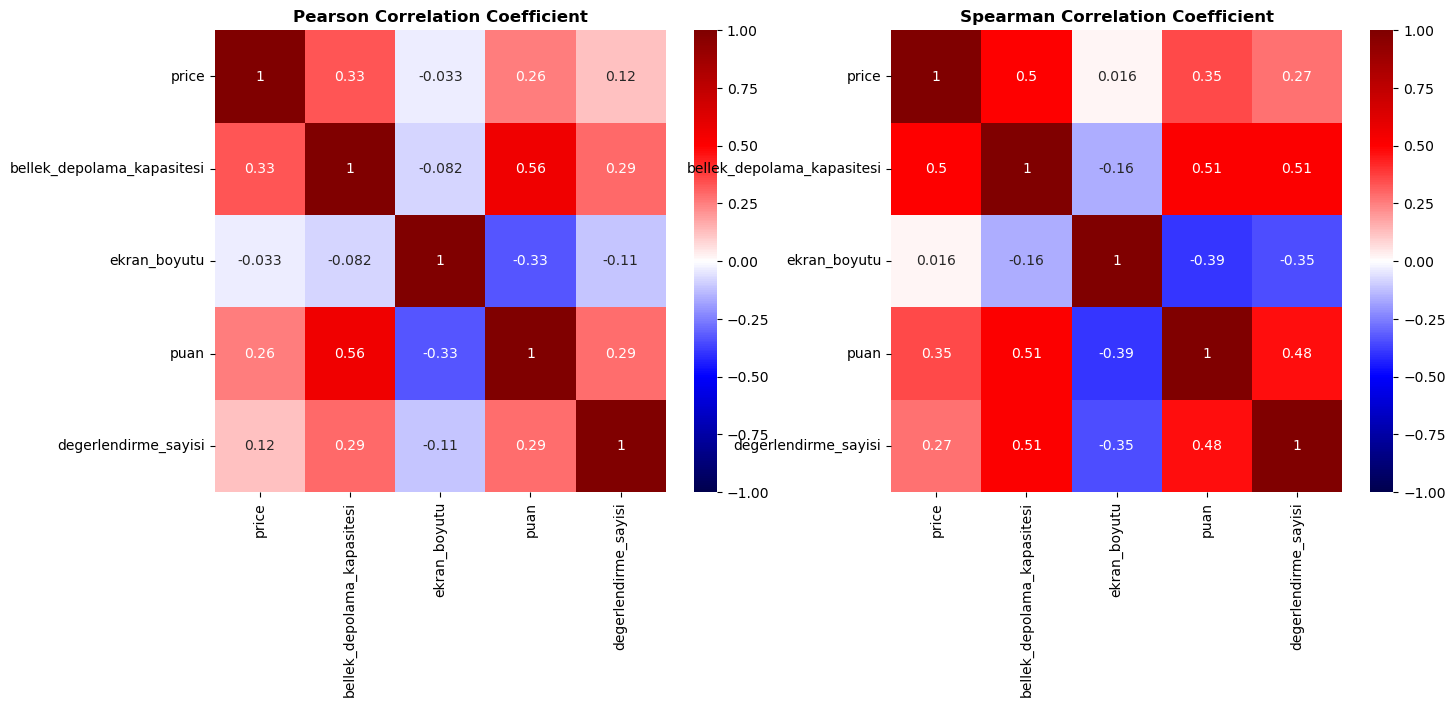

In [139]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
plt.title('Pearson Correlation Coefficient', weight='bold')
sns.heatmap(df2.corr(method='pearson'), cmap="seismic", annot=True, vmin=-1, vmax=1);

plt.subplot(1,2,2)
plt.title('Spearman Correlation Coefficient', weight='bold')
sns.heatmap(df2.corr(method='spearman'), cmap="seismic", annot=True, vmin=-1, vmax=1);

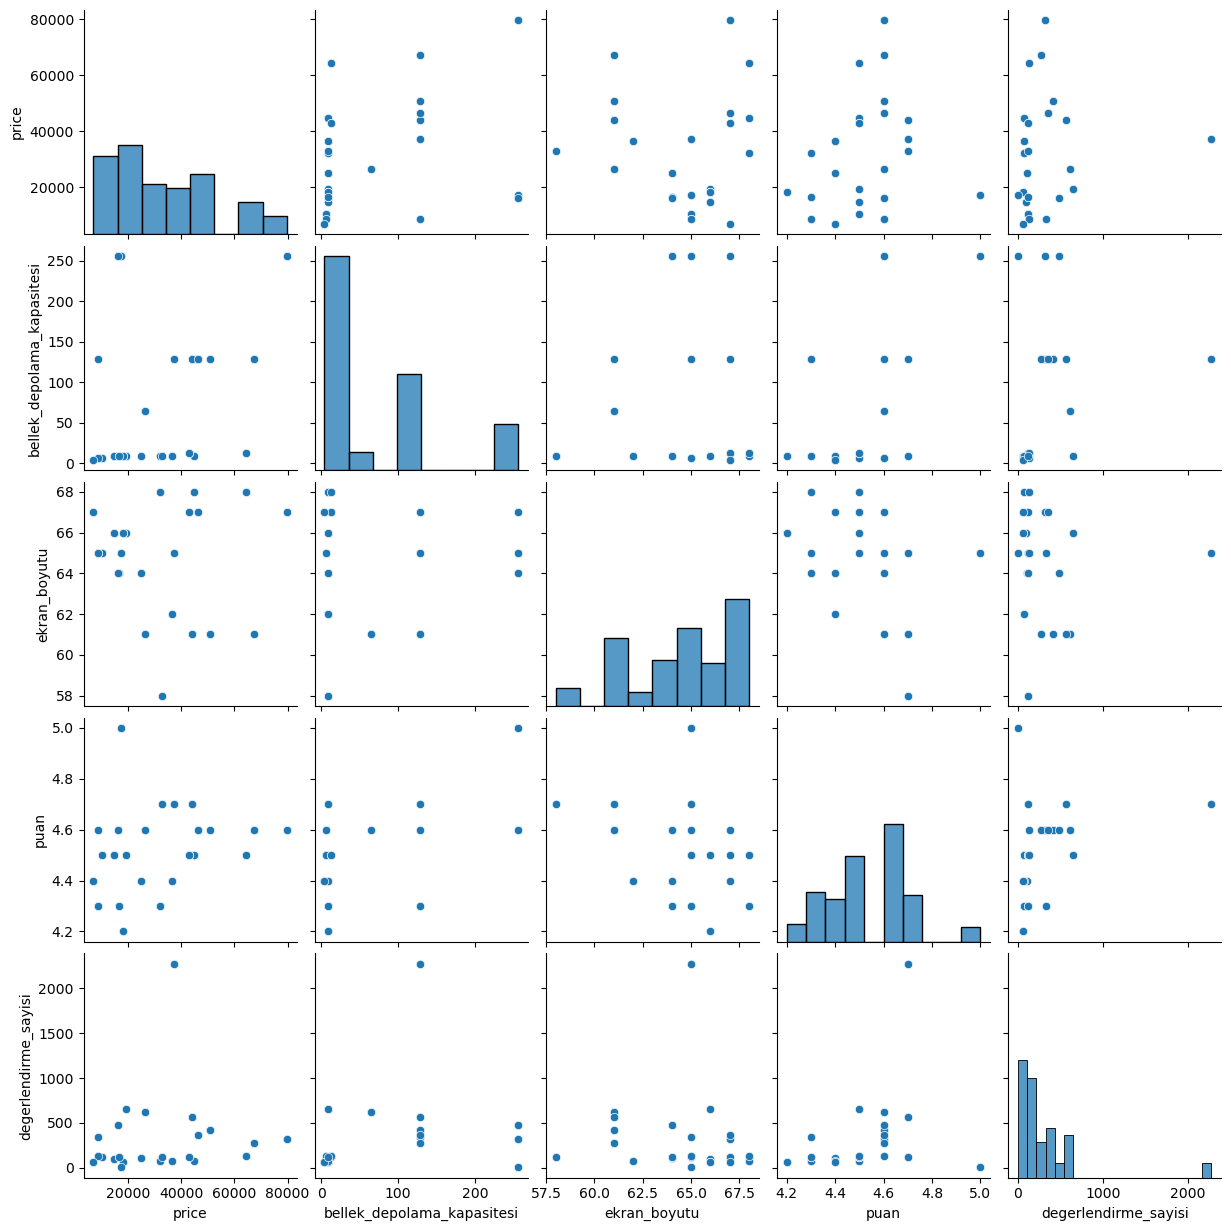

In [141]:
sns.pairplot(df2);

In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 119
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       105 non-null    float64
 1   bellek_depolama_kapasitesi  105 non-null    float64
 2   ekran_boyutu                105 non-null    float64
 3   puan                        105 non-null    float64
 4   degerlendirme_sayisi        105 non-null    float64
dtypes: float64(5)
memory usage: 4.9 KB


In [145]:
#Statsmodels Kullanarak Modelleme

In [225]:
#Statsmodels Kullanarak Modelleme
# Değişkenlerin tanımlaması
y, X = patsy.dmatrices('price ~ bellek_depolama_kapasitesi + ekran_boyutu + puan + degerlendirme_sayisi', data=df2, return_type="dataframe")
# Modeli Oluşturma
model = sm.OLS(y, X)
# Modeli Eğitme
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     3.340
Date:                Fri, 16 Aug 2024   Prob (F-statistic):             0.0130
Time:                        16:03:59   Log-Likelihood:                -1182.7
No. Observations:                 105   AIC:                             2375.
Df Residuals:                     100   BIC:                             2389.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -4.9e+04   9.31e+04     -0.526      0.600   -2.34e+05    1.36e+05
bellek_depolama_kapasitesi    62.2156     27.079      2.298      0.024       8.491     115.940
ekran_boyutu                 213.8875    748.151      0.286      0.776   -1270.422    1698.197
puan                        1.392e+04   1.46e+04      0.952      0.343   -1.51e+04    4.29e+04
degerlendirme_sayisi           0.5251      4.620      0.114      0.910      -8.640       9.691
==============================================================================
Omnibus:                        5.477   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.208
Skew:                           0.223   Prob(JB):                        0.201
Kurtosis:                       2.269   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
# Modeli Oluşturma
lm1 = smf.ols('price ~ bellek_depolama_kapasitesi + puan ', data=df2)

fit2 = lm1.fit()

fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     6.760
Date:                Fri, 16 Aug 2024   Prob (F-statistic):            0.00175
Time:                        15:44:47   Log-Likelihood:                -1182.7
No. Observations:                 105   AIC:                             2371.
Df Residuals:                     102   BIC:                             2379.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -2.979e+04   5.99e+04     -0.498      0.620   -1.49e+05     8.9e+04
bellek_depolama_kapasitesi    63.7141     26.216      2.430      0.017      11.715     115.713
puan                        1.273e+04   1.35e+04      0.946      0.346    -1.4e+04    3.94e+04
==============================================================================
Omnibus:                        5.194   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.202
Skew:                           0.238   Prob(JB):                        0.202
Kurtosis:                       2.288   Cond. No.                     3.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Sklearn Kullanarak Modelleme

In [217]:
# Modeli Oluşturma
lr1 = LinearRegression()

# Featureları Oluşturma
X = df2.iloc[:, 1:]

# Targetı Oluşturma
y = df2.iloc[:, 0]

# Modeli Eğitme
lr1.fit(X, y)

# R2 Değeri
r_squared1 = lr1.score(X,y)
print("R2:", round(r_squared1,3))

# Adjusted R2 Değeri
adjusted_r_squared1 = 1 - (1-r_squared1)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared1,3))

R2: 0.118
Adjusted R2: 0.083


In [ ]:
#Regularization

In [157]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [159]:
std_scale = StandardScaler()

In [179]:
X_ss = std_scale.fit_transform(X) 
df6= pd.DataFrame(X_ss)
df6

,0,1,2,3,4
0,0.0,0.650684,0.183566,1.061316,4.552797
1,0.0,-0.749831,0.554227,-0.136944,-0.477392
2,0.0,0.650684,0.183566,-1.335204,0.068413
3,0.0,0.650684,-1.299081,0.462186,0.248806
4,0.0,-0.749831,-0.187096,-0.736074,-0.468141
...,...,...,...,...,...
100,0.0,0.650684,0.924889,0.462186,0.126231
101,0.0,-0.796515,0.924889,-0.736074,-0.565275
102,0.0,2.144566,0.183566,2.858706,-0.704039
103,0.0,-0.749831,-0.187096,-1.335204,-0.426512


In [215]:
lr3 = LinearRegression()
lr3.fit(X_ss, y)
r_squared1 = lr3.score(X_ss,y)
print("R2:", round(r_squared1,3))

# Adjusted R2 Değeri
adjusted_r_squared1 = 1 - (1-r_squared1)*(len(y)-1)/(len(y)-X_ss.shape[1]-1)
print("Adjusted R2:", round(adjusted_r_squared1,3))

R2: 0.118
Adjusted R2: 0.073
